<a href="https://colab.research.google.com/github/Dianamikolo/Machine-Learning/blob/main/projet_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EXAMEN SYSTEME INELLIGENT**

**Importation  des bibliothèques nécessaires**
Généré les données simulés

In [65]:
import numpy as np
import pandas as pd

np.random.seed(42)
n_samples = 2000  # Plus d'échantillons pour de meilleurs résultats

In [66]:
# Génération des données
data = {
    'temp_int': np.random.uniform(15, 30, n_samples),  # Température intérieure en °C
    'temp_ext': np.random.uniform(5, 40, n_samples),  # Température extérieure en °C
    'luminosité': np.random.uniform(100, 1000, n_samples),  # Luminosité en lux
    'humidité': np.random.uniform(20, 90, n_samples),  # Humidité en %
    'vent': np.random.uniform(0, 50, n_samples),  # Vitesse du vent (km/h)
    'présence': np.random.choice([0, 1], n_samples),  # 0 = vide, 1 = occupé
    'heure': np.random.randint(0, 24, n_samples),  # Heure de la journée
    'jour_semaine': np.random.randint(0, 7, n_samples),  # 0 = Lundi, 6 = Dimanche
}

# Générer une consommation réaliste en fonction des autres variables
# Exemple : plus de consommation quand il fait froid et qu'il y a de la présence
data['consommation'] = (
    50 + 5 * (30 - data['temp_int'])  # Plus il fait froid, plus on consomme
    + 3 * data['luminosité'] / 100  # Impact de la luminosité
    + 4 * (100 - data['humidité']) / 100  # Impact de l’humidité
    + 5 * data['vent'] / 10  # Impact du vent
    + 50 * data['présence']  # Consommation plus élevée s'il y a quelqu'un
    + 10 * np.random.randn(n_samples)  # Ajout de bruit aléatoire
)


In [58]:

# Création du DataFrame
df = pd.DataFrame(data)
df.to_csv("consommation_energetique_simulee.csv", index=False)

# Affichage des 5 premières lignes
df.head()


,temp_int,temp_ext,luminosité,humidité,vent,présence,heure,jour_semaine,consommation
0,20.618102,14.159699,614.796290,65.377987,36.013396,0,18,3,119.470571
1,29.260715,13.644258,824.889096,32.067045,34.364150,1,16,6,133.306762
2,25.979909,36.718910,784.144837,81.067619,4.787710,1,9,1,132.935673
3,23.979877,13.734117,238.509914,62.918137,46.128620,1,18,5,161.963564
4,17.340280,14.518240,234.324523,31.004272,28.423610,0,10,3,139.245752


**les Corrélations**

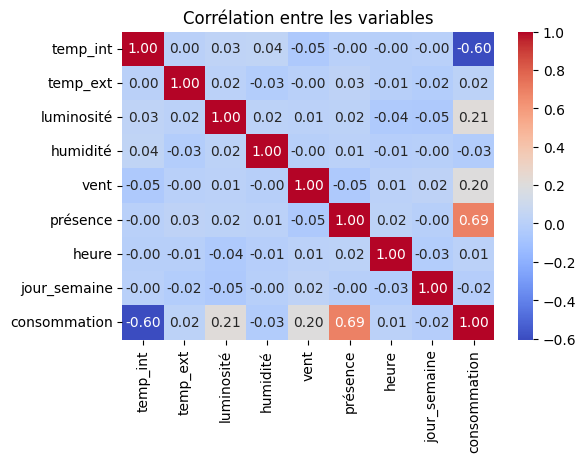

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre les variables")
plt.show()


**Préparation des Données pour Random Forest**

On divise les données en train/test et on normalise les valeurs

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des features et de la cible
X = df[['temp_int', 'temp_ext', 'luminosité', 'humidité', 'vent', 'présence', 'heure', 'jour_semaine']]
y = df['consommation']

# Séparation en train/test (70% - 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Entraînement du Modèle Random Forest**
On ajuste les hyperparamètres pour améliorer les performances

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Définition du modèle Random Forest avec réglages optimisés
model = RandomForestRegressor(
    n_estimators=300,  # Augmentation du nombre d'arbres
    max_depth=15,  # Limite la profondeur pour éviter le surapprentissage
    min_samples_split=5,  # Évite que l'arbre se spécialise trop
    min_samples_leaf=2,
    random_state=42
)

# Entraînement du modèle
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, random_state=42)

**Évaluation du Modèle**
On évalue la précision avec MAE, MSE, RMSE :

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prédictions sur le test set
y_pred = model.predict(X_test)

# Calcul des erreurs
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"📊 Nouvelle Évaluation du Modèle :")
print(f"MAE  : {mae:.2f} Wh (Erreur absolue moyenne)")
print(f"MSE  : {mse:.2f} Wh² (Erreur quadratique moyenne)")
print(f"RMSE : {rmse:.2f} Wh (Racine de l'erreur quadratique moyenne)")


📊 Nouvelle Évaluation du Modèle :
MAE  : 8.58 Wh (Erreur absolue moyenne)
MSE  : 117.15 Wh² (Erreur quadratique moyenne)
RMSE : 10.82 Wh (Racine de l'erreur quadratique moyenne)


**Visualisation des Résultats**
On affiche les prédictions VS vraies valeurs

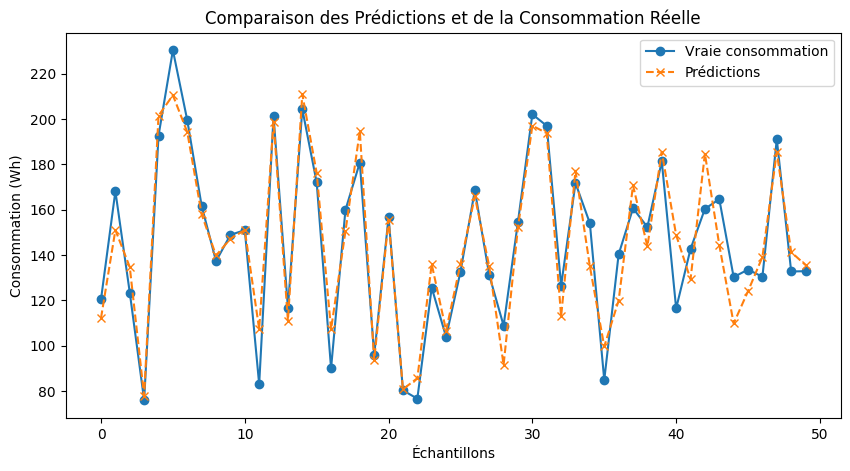

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Vraie consommation", marker="o")
plt.plot(y_pred[:50], label="Prédictions", linestyle="dashed", marker="x")
plt.xlabel("Échantillons")
plt.ylabel("Consommation (Wh)")
plt.title("Comparaison des Prédictions et de la Consommation Réelle")
plt.legend()
plt.show()


## **Logique Floue**

Exemple de règles floues :

🔹 Si température élevée ET présence détectée → Réduire la climatisation modérément.

🔹 Si luminosité faible ET présence détectée → Augmenter l'éclairage progressivement.

🔹 Si consommation trop élevée → Optimiser l’alimentation en énergie.



In [87]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Générer des données simulées pour l'exemple
n_samples = 2000
np.random.seed(42)

data = {
    'temp_int': np.random.uniform(15, 30, n_samples),
    'luminosité': np.random.uniform(100, 1000, n_samples),
    'présence': np.random.choice([0, 1], n_samples),
}

df = pd.DataFrame(data)

# Définir les variables floues pour la température, luminosité, présence et consommation
temp_int = ctrl.Antecedent(np.arange(15, 30, 1), 'temp_int')
luminosité = ctrl.Antecedent(np.arange(100, 1000, 1), 'luminosité')
présence = ctrl.Antecedent([0, 1], 'présence')
consommation = ctrl.Consequent(np.arange(100, 500, 1), 'consommation')

# Définir les fonctions d'appartenance pour chaque variable
temp_int['faible'] = fuzz.trimf(temp_int.universe, [15, 17, 20])
temp_int['élevée'] = fuzz.trimf(temp_int.universe, [25, 27, 30])

luminosité['faible'] = fuzz.trimf(luminosité.universe, [100, 200, 400])
luminosité['élevée'] = fuzz.trimf(luminosité.universe, [600, 800, 1000])

présence['absent'] = fuzz.trimf(présence.universe, [0, 0, 1])
présence['présent'] = fuzz.trimf(présence.universe, [0, 1, 1])

consommation['faible'] = fuzz.trimf(consommation.universe, [100, 150, 250])
consommation['élevée'] = fuzz.trimf(consommation.universe, [300, 400, 500])

# Définir les règles floues
rule1 = ctrl.Rule(temp_int['élevée'] & présence['présent'], consommation['élevée'])
rule2 = ctrl.Rule(temp_int['faible'] & présence['absent'], consommation['faible'])
rule3 = ctrl.Rule(luminosité['élevée'] & présence['absent'], consommation['faible'])
rule4 = ctrl.Rule(luminosité['faible'] & présence['présent'], consommation['élevée'])

# Créer le système de contrôle flou
consommation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
consommation_simulation = ctrl.ControlSystemSimulation(consommation_ctrl)

# Appliquer la logique floue sur un exemple de données
consommation_simulation.input['temp_int'] = 26  # Température intérieure
consommation_simulation.input['luminosité'] = 450  # Luminosité
consommation_simulation.input['présence'] = 1  # Présence

# Calculer la consommation à l'aide de la logique floue
consommation_simulation.compute()

# Afficher la consommation
print(f"Consommation prédit : {consommation_simulation.output['consommation']} Wh")


Consommation prédit : 399.9933773362672 Wh


In [43]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


**Définition des Variables Floues.**

**On crée des ensembles flous pour la température, la luminosité, la présence et la consommation énergétique.**

In [44]:
# Définition des variables d'entrée
température = ctrl.Antecedent(np.arange(15, 31, 1), 'température')
luminosité = ctrl.Antecedent(np.arange(100, 801, 50), 'luminosité')
présence = ctrl.Antecedent(np.arange(0, 2, 1), 'présence')

# Variable de sortie : consommation énergétique
consommation = ctrl.Consequent(np.arange(100, 501, 50), 'consommation')

# Définition des ensembles flous
température.automf(3)  # ['poor', 'average', 'good'] → ['basse', 'moyenne', 'élevée']
luminosité.automf(3)
présence['absent'] = fuzz.trimf(présence.universe, [0, 0, 1])
présence['présent'] = fuzz.trimf(présence.universe, [0, 1, 1])

consommation['faible'] = fuzz.trimf(consommation.universe, [100, 150, 250])
consommation['moyenne'] = fuzz.trimf(consommation.universe, [200, 300, 400])
consommation['élevée'] = fuzz.trimf(consommation.universe, [350, 450, 500])


**Création des Règles Floues**
**On définit les règles qui régissent le comportement du système.**

In [45]:
rule1 = ctrl.Rule(température['poor'] & présence['présent'], consommation['faible'])
rule2 = ctrl.Rule(température['average'] & présence['présent'], consommation['moyenne'])
rule3 = ctrl.Rule(température['good'] & présence['présent'], consommation['élevée'])
rule4 = ctrl.Rule(luminosité['poor'] & présence['présent'], consommation['moyenne'])
rule5 = ctrl.Rule(luminosité['good'], consommation['faible'])
rule6 = ctrl.Rule(présence['absent'], consommation['faible'])


**Création du Système Flou**
**On compile les règles et on crée un simulateur de décision floue.**

In [47]:
# Création du système de contrôle
consommation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
consommation_sim = ctrl.ControlSystemSimulation(consommation_ctrl)

# Test du système avec des valeurs réelles
consommation_sim.input['température'] = 28  # °C
consommation_sim.input['luminosité'] = 200  # lux
consommation_sim.input['présence'] = 1  # Présence détectée

# Calcul de la décision
consommation_sim.compute()
print(f"Consommation énergétique optimisée : {consommation_sim.output['consommation']:.2f} Wh")


Consommation énergétique optimisée : 357.11 Wh


In [72]:
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [79]:
!pip install pyngrok


In [82]:
from pyngrok import ngrok

# Utilise ton token d'authentification Ngrok ici
ngrok.set_auth_token("2sHIMeuLmWsj0T77YfkxSnYF3d4_6w1Nf2tMesAgXcqkRN9WW")

In [83]:
# Ouvre un tunnel sur le port 8501 (le port par défaut de Streamlit)
public_url = ngrok.connect(8501)
public_url


<NgrokTunnel: "https://2402-34-168-236-163.ngrok-free.app" -> "http://localhost:8501">

In [84]:
from pyngrok import ngrok
import os

# Étape 1 : Lance Streamlit en arrière-plan
os.system("streamlit run /path/to/ton/script.py &")

# Étape 2 : Créer un tunnel ngrok pour exposer l'application Streamlit (port 8501)
public_url = ngrok.connect(8501)
print("Streamlit app is available at:", public_url)


Streamlit app is available at: NgrokTunnel: "https://3254-34-168-236-163.ngrok-free.app" -> "http://localhost:8501"
